In [1]:
import numpy as np
from mfpml.optimization.sfbo import BayesOpt
from mfpml.problems.singlefidelity_functions import Forrester
from mfpml.optimization.sf_acqusitions import EI, LCB, PI
from mfpml.models.kriging import Kriging
from mfpml.design_of_experiment.singlefideliy_samplers import LatinHyperCube


In [2]:
func = Forrester
print(func.optimum)
sampler = LatinHyperCube(design_space=func.design_space, seed=7)
# get samples
sample_x = sampler.get_samples(num_samples=3)
sample_y = func.f(sample_x)


-6.02074


In [3]:
# print(best_y, best_x)
model = Kriging(design_space=func.input_domain)
acf1 = PI()

In [4]:
opti = BayesOpt(problem=func)
opti.run_optimizer(
    surrogate=model,
    acquisition=acf1,
    max_iter=10,
    init_x=sample_x,
    init_y=sample_y,
)


iter:0 =====================================
best_y: -5.893617
best_x: [0.7414381]
iter:1 =====================================
best_y: -5.894349
best_x: [[0.74148491]]
iter:2 =====================================
best_y: -5.894349
best_x: [[0.74148491]]
iter:3 =====================================
best_y: -5.952950
best_x: [[0.7457847]]
iter:4 =====================================
best_y: -5.967030
best_x: [[0.74706518]]
iter:5 =====================================
best_y: -6.017079
best_x: [[0.75462052]]
iter:6 =====================================
best_y: -6.020446
best_x: [[0.75799014]]
iter:7 =====================================
best_y: -6.020446
best_x: [[0.75799014]]
iter:8 =====================================
best_y: -6.020446
best_x: [[0.75799014]]
iter:9 =====================================
best_y: -6.020446
best_x: [[0.75799014]]
iter:10 =====================================
best_y: -6.020682
best_x: [[0.75692022]]


(-6.020682471774182, array([[0.75692022]]))

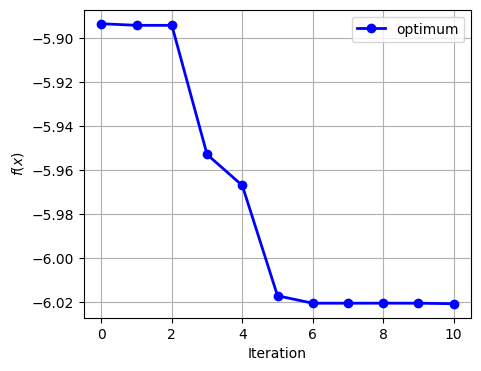

In [5]:
opti.plot_optimization_history(figsize=(5, 4))


In [6]:
print(opti.log)


OrderedDict([(0, (array([[0.12496818],
       [0.3675954 ],
       [0.7414381 ]]), array([[-0.93492019],
       [ 0.01688959],
       [-5.89361684]]))), (1, (array([[0.74148491]]), array([[-5.89434879]]))), (2, (array([[0.81190133]]), array([[-4.24165443]]))), (3, (array([[0.7457847]]), array([[-5.95295021]]))), (4, (array([[0.74706518]]), array([[-5.9670299]]))), (5, (array([[0.75462052]]), array([[-6.01707927]]))), (6, (array([[0.75799014]]), array([[-6.02044592]]))), (7, (array([[0.52575336]]), array([[0.98589388]]))), (8, (array([[1.06829517e-06]]), array([[3.02715706]]))), (9, (array([[0.23302018]]), array([[-0.3381297]]))), (10, (array([[0.75692022]]), array([[-6.02068247]])))])


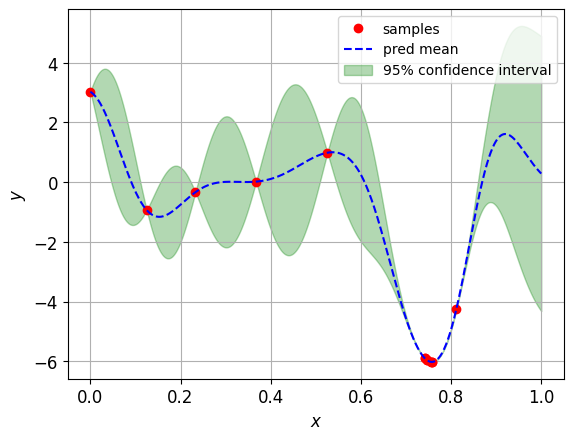

In [7]:
opti.surrogate.plot_prediction()
